In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os

# Change directory to your working directory
DATA_DIR = "/content/drive/MyDrive/Year 4/NLP/Final Project"

os.chdir(DATA_DIR)
os.getcwd()

'/content/drive/MyDrive/Year 4/NLP/Final Project'

## Section 1: Loading Data ##
This section will only be run once and does not need to be run again

In [ ]:
%pip install convokit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 2.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 87.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━

I first shortened the csv files for enron, medium articles, and un general debates. Since we'll only be sampling a subset of 300 from each, we don't need to load the whole file

In [ ]:
#DONT RUN THIS ANYMORE
from datasets import load_dataset, Dataset
from convokit import Corpus, download


#TRAIN SETS, choosing 300 samples frome each written text set
num_samples = 300

""" Formal"""
ds_un_docs = load_dataset("Helsinki-NLP/un_pc", "en-es")
ds_un_docs_sub = ds_un_docs["train"].shuffle(seed=42).select(range(num_samples))
del ds_un_docs

#ds_un_debates = load_dataset('csv', data_files="shortened-un-general-debates.csv") # formal]
#ds_un_debates_sub = ds_un_debates["train"].shuffle(seed=42).select(range(num_samples))
#del ds_un_debates

""" Semi-formal"""
#ds_enron= load_dataset('csv', data_files='shortened-enron_labeled_curated.csv') #enron, very formal business emails probably?
#ds_enron_sub = ds_enron["train"].shuffle(seed=42).select(range(num_samples))
#del ds_enron

#ds_medium = load_dataset('csv', data_files='shortened-medium_articles.csv') #medium articles, academic but also likely less formal ? community contributions
#https://huggingface.co/datasets/kariatouk/enron_curated_labeled/tree/main
#ds_medium_sub = ds_medium["train"].shuffle(seed=42).select(range(num_samples))
#del ds_medium


ds_podcast_news = load_dataset("Whispering-GPT/lex-fridman-podcast")
ds_podcast_news_sub = ds_podcast_news["train"].shuffle(seed=42).select(range(num_samples//5))#podcasts are long so only gonna use 100 samples
del ds_podcast_news

"""Educational"""
ds_edu = load_dataset("Locutusque/UltraTextbooks") #synthetic and human written textbooks..... acdademic / formal
#https://huggingface.co/datasets/fabiochiu/medium-articles
ds_edu_sub = ds_edu["train"].shuffle(seed=42).select(range(num_samples))
del ds_edu

# khan academy dataset
ds_khan_edu = load_dataset("iblai/ibl-khanacademy-transcripts")
ds_khan_edu_sub = ds_khan_edu["train"].shuffle(seed=42).select(range(num_samples))
del ds_khan_edu

"""Informal"""
ds_sms = load_dataset("ucirvine/sms_spam") #should only use ham labels, text messages, informal
#filtering out the spam label - only getting legitimate texts
ds_sms_filtered = ds_sms["train"].filter(lambda example: example['label'] == 0)
ds_sms_sub = ds_sms_filtered.shuffle(seed=42).select(range(num_samples + 100)) #adding 100 just because messages are short
del ds_sms

ds_telephone_convos = Corpus(filename=download("switchboard-corpus"))
data = ds_telephone_convos.get_utterances_dataframe()
data_list = data.to_dict(orient="records")
ds_telephone_convos = Dataset.from_list(data_list)
ds_telephone_sub = ds_telephone_convos.shuffle(seed=42).select(range(200, 200 + num_samples))
del ds_telephone_convos

#this cell ran in 21 minutes (probably don't have to load the whole dataset?)

Resolving data files:   0%|          | 0/17 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/17 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/17 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/23 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/23 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/5523999 [00:00<?, ? examples/s]

DatasetGenerationError: An error occurred while generating the dataset

In [ ]:
#city council meetings instead https://huggingface.co/datasets/lytang/MeetingBank-transcript?row=8&library=datasets
ds_business_meetings = load_dataset("lytang/MeetingBank-transcript")
ds_business_meetings_sub = ds_business_meetings["train"].shuffle(seed=42).select(range(num_samples))
#https://huggingface.co/datasets/kariatouk/enron_curated_labeled/tree/main
del ds_business_meetings

In [ ]:
ds_telephone_sub[0:1]["text"]

['[ Have, + have ] you gone straight through? /']

In [ ]:
#combine
from datasets import Dataset, concatenate_datasets
import random

un_docs_dataset = Dataset.from_dict({"text": ds_un_docs_sub["translation"],
                                     "source": ["un_corpus"] * len(ds_un_docs_sub),
                                     "formality": ["formal"] * len(ds_un_docs_sub)})
#print(un_docs_dataset[:2])
medium_dataset = Dataset.from_dict({"text": ds_medium_sub["text"],
                                    "source": ["medium"] * len(ds_medium_sub),
                                    "formality": ["semiformal"] * len(ds_medium_sub)})
edu_dataset = Dataset.from_dict({"text": ds_edu_sub["text"],
                                 "source": ["textbooks"] * len(ds_edu_sub),
                                 "formality": ["educational"] * len(ds_edu_sub)})
sms_dataset = Dataset.from_dict({"text": ds_sms_sub["sms"],
                                 "source": ["sms"] * len(ds_sms_sub),
                                 "formality": ["informal"] * len(ds_sms_sub)})
enron_dataset = Dataset.from_dict({"text": ds_enron_sub["email"],
                                   "source": ["enron_emails"] * len(ds_enron_sub),
                                   "formality": ["formal"] * len(ds_enron_sub)})



podcast_news_dataset = Dataset.from_dict({"text": ds_podcast_news_sub["text"],
                                     "source": ["podcasts"] * len(ds_podcast_news_sub),
                                     "formality": ["semiformal"] * len(ds_podcast_news_sub)})
un_debates_dataset = Dataset.from_dict({"text": ds_un_debates_sub["text"],
                                   "source": ["un_debates"] * len(ds_un_debates_sub),
                                   "formality": ["formal"] * len(ds_un_debates_sub)})
khan_edu_dataset = Dataset.from_dict({"text": ds_khan_edu_sub["content"],
                                 "source": ["khan_academy"] * len(ds_khan_edu_sub),
                                 "formality": ["educational"] * len(ds_khan_edu_sub)})
print(khan_edu_dataset[:2])
telephone_dataset = Dataset.from_dict({"text": ds_telephone_sub["text"],
                                    "source": ["telephone_convos"] * len(ds_telephone_sub),
                                    "formality": ["informal"] * len(ds_telephone_sub)})
business_meetings_dataset = Dataset.from_dict({"text": ds_business_meetings_sub["source"],
                                 "source": ["business_meetings"] * len(ds_business_meetings_sub),
                                 "formality": ["formal"] * len(ds_business_meetings_sub)})



{'text': ['WEBVTT\nKind: captions\nLanguage: en\n\n00:00:00.944 --> 00:00:03.596\n(pop music)\n\n00:00:03.626 --> 00:00:07.552\nLarry: It started with just a\nfew little videos on algebra\n\n00:00:07.552 --> 00:00:11.447\nto help out a cousin who\nneeded assistance in school,\n\n00:00:11.447 --> 00:00:15.128\nand, from there, it grew\nand grew and grew into more\n\n00:00:15.128 --> 00:00:21.049\nthan 3,200 YouTube videos,\ngiving all kinds of instruction.\n\n00:00:21.049 --> 00:00:24.724\nIt\'s known as the Khan Academy,\nbut, more than just that,\n\n00:00:24.724 --> 00:00:27.231\nit\'s leading to a rethinking\nof how education is\n\n00:00:27.231 --> 00:00:30.046\ndelivered in the nation\'s\nclassrooms and at home.\n\n00:00:30.046 --> 00:00:32.466\nSalman Khan\'s new book, The One World\n\n00:00:32.466 --> 00:00:34.836\nSchool House: Education Reimagined.\n\n00:00:34.836 --> 00:00:36.391\nSal, thank you for joining us.\n\n00:00:36.391 --> 00:00:37.351\nWe appreciate it very much.\n\n00

## Section 2: Preprocessing Each Dataset ##

In [ ]:
from datasets import load_dataset, Dataset
import re #https://docs.python.org/3/library/re.html

In [ ]:
#Preprocess UN Docs

un_docs_dataset = un_docs_dataset.map(lambda item: {"text": item["text"]["en"]}) # I only want the 'en' keys
print(un_docs_dataset[:2])


Map:   0%|          | 0/300 [00:00<?, ? examples/s]

{'text': ['Mr. James Revill Consultant', '118.117. Continue efforts in requesting support to intensify the abilities of Jordan to respond to the needs of Syrian refugees who are present on Jordanian territory (Qatar);'], 'source': ['un_corpus', 'un_corpus'], 'formality': ['formal', 'formal']}


In [ ]:
#Preprocess Medium

#maybe get rid of first and last sentence because usually just has author info etc
#get rid of brackted numbers?

def preprocess_medium(text):
    #remove first and last sentence
    sentences = text.split('.')
    if len(sentences) > 2:
        text = '.'.join(sentences[1:-1])
    #bracketed numbers (citations)
    text = re.sub(r'\[\d+\]', '', text)
    return text

medium_dataset = medium_dataset.map(lambda process: {"text": preprocess_medium(process["text"])})

Map:   0%|          | 0/300 [00:00<?, ? examples/s]

In [ ]:
#don't need to special process edu dataset
#Don't need to special Preprocess SMS

In [ ]:
def preprocess_enron(text):
    #get rid of Subject: line and also first three sentences or so bc they tend to be garbage...
    text = text.replace("Subject: ", "")
    first_period_index = text.find('.')
    if first_period_index != -1:
        text = text[first_period_index + 1:]

    text = re.sub(r'=', '', text)  # looks like some of the emails have equals signs in between words? will this affect euqations drasticall?
    # WE MIGHT WANT TO TRY BY TAKING OUT MOST PUNCTUATION???? IDK
    return text

enron_dataset = enron_dataset.map(lambda process: {"text": preprocess_enron(process["text"])})

Map:   0%|          | 0/300 [00:00<?, ? examples/s]

In [ ]:
def preprocess_business(text):
    # Remove speaker labels
    text = re.sub(r'Speaker \d+:', '', text)
    return text

business_meetings_dataset = business_meetings_dataset.map(lambda process: {"text": preprocess_business(process["text"])})

Map:   0%|          | 0/300 [00:00<?, ? examples/s]

In [ ]:
def preprocess_khan_text(text):
    #timestamps like 00:00:00.000 --> 00:00:01.749
    text = re.sub(r'\d{2}:\d{2}:\d{2}\.\d{3} --> \d{2}:\d{2}:\d{2}\.\d{3}', '', text)

    # Remove ALL CAPS names in transcript "SALMAN KHAN
    text = re.sub(r'[A-Z]{2,}( [A-Z]{2,})*:', '', text)

    # extra \n and spaces
    text = re.sub(r'\n+', '\n', text)
    text = text.strip()  #whitespace

    return text

khan_edu_dataset = khan_edu_dataset.map(lambda process: {"text": preprocess_khan_text(process["text"])})

Map:   0%|          | 0/300 [00:00<?, ? examples/s]

In [ ]:
#combine datasets
combined_written_dataset = concatenate_datasets([un_docs_dataset, medium_dataset, edu_dataset, sms_dataset, enron_dataset])
combined_written_dataset = combined_written_dataset.add_column("type", ["written"] * len(combined_written_dataset))

combined_spoken_dataset = concatenate_datasets([podcast_news_dataset, un_debates_dataset, khan_edu_dataset, telephone_dataset, business_meetings_dataset])
combined_spoken_dataset = combined_spoken_dataset.add_column("type", ["spoken"] * len(combined_spoken_dataset))

full_dataset = concatenate_datasets([combined_spoken_dataset, combined_written_dataset])

full_dataset = full_dataset.shuffle(seed=42)

## Section 3: Preprocess All Text

Remove all stopwords, and all non-alphabetical values like punctuation and numeric values to ensure consistency across spoken and written texts

In [ ]:
import nltk
from nltk.corpus import stopwords
import string
import re

nltk.download("stopwords")

stop_words = set(stopwords.words("english"))

def preprocess_all_text(text):
    # Handle NoneType objects
    if text is None:
        return None

    # Remove code?? and HTML tags
    text = re.sub(r'<[^>]+>', '', text)  # HTML tags
    text = re.sub(r'```.*?```', '', text, flags=re.DOTALL)  # Removes code blocks (```code```)

    text = text.lower()
    #REMOVE URLS AND LINKS
    text = re.sub(r'http\S+|www\.\S+|\S+\.(com|org|net|io|co|uk|gov|edu)\S*', '', text)
    # Remove everything that is not a letter or space
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)
    #Remove stop words
    cleaned_text = ' '.join([word for word in text.split() if word.lower() not in stop_words])
    #remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Return None if the text is empty after preprocessing
    if not text:
        return None

    return text

full_dataset = full_dataset.map(lambda process: {"text": preprocess_all_text(process["text"])})
full_dataset = full_dataset.filter(lambda process: process["text"] is not None and process["text"].strip() != "")

Map:   0%|          | 0/2900 [00:00<?, ? examples/s]

Filter:   0%|          | 0/2900 [00:00<?, ? examples/s]

Creating CSV from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

28299694

In [46]:
#save
import pandas as pd
df = pd.DataFrame(full_dataset['train'])
df.to_csv("final_dataset.csv", index=False)

## Step 4: Data Analysis ##

In [13]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from tqdm import tqdm

from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [57]:
#Load in new dataset
from datasets import load_dataset, Dataset
full_dataset = load_dataset('csv', data_files='spoken_written_full_dataset_clean.csv')
len(full_dataset['train']) #should be 2843

Generating train split: 0 examples [00:00, ? examples/s]

2843

In [58]:
full_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'source', 'formality', 'type'],
        num_rows: 2843
    })
})

In [69]:
# Filter out rows where "text" is None
full_dataset = full_dataset.filter(lambda process: process["text"] is not None)


Filter:   0%|          | 0/2836 [00:00<?, ? examples/s]

In [38]:
print(full_dataset[0])

{'text': 'delegation peru greatly pleased sir election presidency general assembly fiftyfourth session especially since peru active participant namibias independence process advanced united nations first speaker mornings meeting particularly pleased congratulate officers general assembly arrival new millennium great historic opportunity initiate era peace progress well people earth excluded requires greater commitment part international community create conditions enable developing nations properly channel energy potential view achieving comprehensive national development height twentieth century majority worlds peoples remain mired social cultural technological conditions nineteenth century even earlier centuries shall able truly speak new era aspirations twenty first century third millennium become tangible reality peoples peoples succeed fulfilling legitimate aspirations words globalized world globalize wellbeing dignity conversion economies adapt globalization social costs bear pro

In [70]:
spoken_texts = [process["text"] for process in full_dataset["train"] if process["type"] == "spoken"]
written_texts = [process["text"] for process in full_dataset["train"] if process["type"] == "written"]

In [60]:
def preprocess_corpus(data):
    """ Tokenize, sentencize, and lowercase the input data.

        Args:
            data: list of strings, where each string is a document

        Return:
            list of lists, with tokenized, lowercased sentences from each of the processed rows
    """
    tokenized_sentences = []

    for doc in tqdm(data):
        sentences = sent_tokenize(doc)
        for sentence in sentences:
            tokenized_sentences.append(word_tokenize(sentence))
    return tokenized_sentences

In [71]:
ds_processed_written = preprocess_corpus(written_texts)
ds_processed_spoken = preprocess_corpus(spoken_texts)

100%|██████████| 1245/1245 [00:07<00:00, 162.87it/s]


In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def analyze_tokens(tokenized_data, type):
    """ Perform token & vocabulary analysis.

        Args:
            tokenized_data: List of tokenized sentences (list of lists)
            dataset_name: String, name of the dataset for labeling
    """
    all_words = [word for sentence in tokenized_data for word in sentence]

    vocab_size = len(set(all_words))
    print(f"Vocabulary Size: {vocab_size}")

    word_counts = Counter(all_words)
    most_common_words = word_counts.most_common(20)
    print(f"Most Common Words:")
    print(most_common_words)

    stopword_count = sum(word_counts[word] for word in stop_words if word in word_counts)
    total_words = sum(word_counts.values())
    stopword_ratio = stopword_count / total_words
    print(f"Stopword Ratio: {stopword_ratio:.2%}\n")

    #common word plot
    words, counts = zip(*most_common_words)
    plt.figure(figsize=(10, 5))
    plt.bar(words, counts)
    plt.xticks(rotation=45)
    plt.title(f"Most Common Words in {type} Dataset")
    plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Vocabulary Size: 41695
Most Common Words:
[('like', 21560), ('think', 13351), ('know', 11311), ('people', 10782), ('one', 10301), ('would', 10250), ('thats', 10220), ('right', 9295), ('going', 7511), ('im', 7460), ('well', 7315), ('dont', 7209), ('really', 6790), ('theres', 6790), ('also', 6304), ('get', 6283), ('world', 6201), ('yeah', 6109), ('youre', 5910), ('way', 5873)]
Stopword Ratio: 0.16%



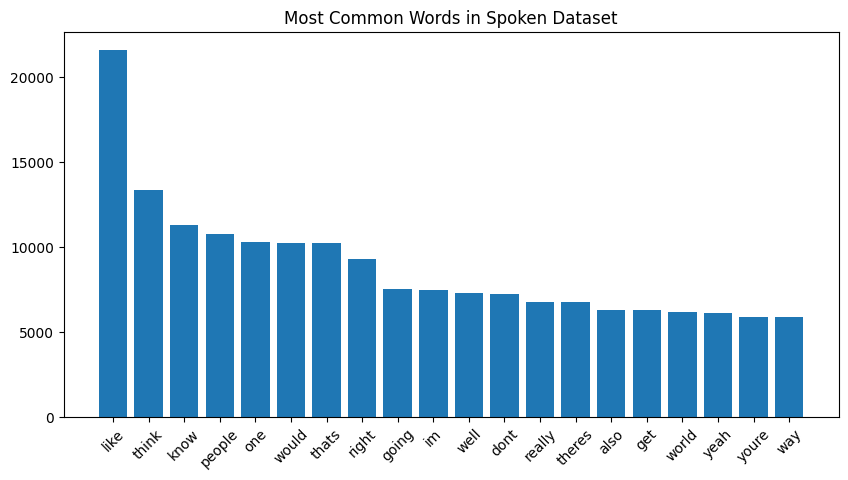

Vocabulary Size: 34025
Most Common Words:
[('also', 1510), ('book', 1412), ('one', 1402), ('time', 1265), ('data', 1071), ('new', 891), ('people', 862), ('would', 853), ('like', 779), ('use', 776), ('make', 738), ('us', 724), ('al', 700), ('need', 693), ('love', 691), ('two', 667), ('may', 664), ('even', 655), ('et', 655), ('life', 654)]
Stopword Ratio: 0.27%



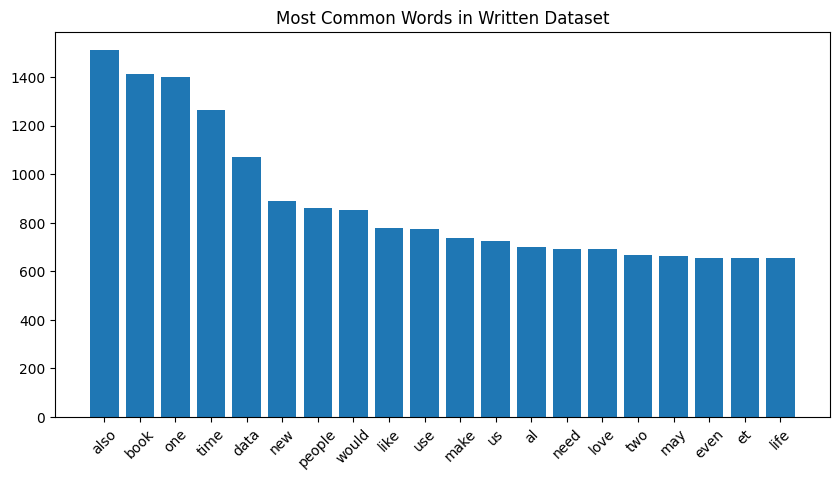

In [73]:
analyze_tokens(ds_processed_spoken, "Spoken")
analyze_tokens(ds_processed_written, "Written")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy

# Load English NLP model
nlp = spacy.load("en_core_web_sm")

def get_pos_distribution(text):
    doc = nlp(text)
    pos_counts = {pos: 0 for pos in ["NOUN", "VERB", "ADJ", "ADV", "PRON", "ADP", "DET", "CCONJ", "PART", "PUNCT"]}
    for token in doc:
        if token.pos_ in pos_counts:
            pos_counts[token.pos_] += 1
    return pos_counts

df = pd.DataFrame(full_dataset['train'])
df["pos_distribution"] = df["text"].apply(get_pos_distribution)

# Convert POS dictionary to individual columns
pos_df = df["pos_distribution"].apply(pd.Series)
df = pd.concat([df, pos_df], axis=1)

pos_summary = df.groupby(["formality", "modality"]).sum().drop(columns=["pos_distribution"])
pos_summary = pos_summary.div(pos_summary.sum(axis=1), axis=0)

plt.figure(figsize=(12, 6))
pos_summary.T.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(12, 6))

plt.xlabel("Part of Speech")
plt.ylabel("Proportion")
plt.title("POS Distribution by Formality and Modality (Spoken vs. Written)")
plt.legend(title="Formality - Modality", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import pandas as pd
from collections import defaultdict

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

#update pronoun_counts dictionary to track both formality and modality (written/spoken)
pronoun_counts = {
    (level, modality): defaultdict(int)
    for level in set(full_dataset['train']['formality'])
    for modality in set(full_dataset['train']['type'])
}

personal_pronouns = {"I", "we", "me", "us"}

def get_pronoun_distribution(text):
    doc = nlp(text)
    pronoun_distribution = defaultdict(int)
    for token in doc:
        if token.text.lower() in personal_pronouns:
            pronoun_distribution[token.text.lower()] += 1
    return pronoun_distribution

# dataset split processing
for example in full_dataset['train']:
    formality_level = example["formality"]
    modality = example["type"]
    text = example["text"]
    pronoun_distribution = get_pronoun_distribution(text)

    for pronoun, count in pronoun_distribution.items():
        pronoun_counts[(formality_level, modality)][pronoun] += count

pronoun_df = pd.DataFrame(pronoun_counts).fillna(0)

pronoun_df = pronoun_df.div(pronoun_df.sum(axis=0), axis=1)

plt.figure(figsize=(12, 6))
pronoun_df.T.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(12, 6))

plt.xlabel("Formality Level and Modality")
plt.ylabel("Proportion of Personal Pronoun Usage")
plt.title("Personal Pronoun Distribution by Formality Level and Modality")
plt.legend(title="Pronouns", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import spacy
from collections import defaultdict


nlp = spacy.load("en_core_web_sm")

pos_tags = ["NOUN", "VERB", "ADJ", "ADV", "PRON", "ADP", "DET", "CCONJ", "PART", "PUNCT"]
personal_pronouns = {"I", "we", "me", "us"}

def process_text(text):
    doc = nlp(text)

    pos_counts = {pos: 0 for pos in pos_tags}
    pronoun_distribution = defaultdict(int)

    for token in doc:
        #Count POS tags
        if token.pos_ in pos_counts:
            pos_counts[token.pos_] += 1

        #Count personal pronouns
        if token.text.lower() in personal_pronouns:
            pronoun_distribution[token.text.lower()] += 1

    return pos_counts, pronoun_distribution

# Convert DatasetDict to DataFrame
df = pd.DataFrame(full_dataset["train"])

# Apply the combined function
df["processed"] = df["text"].apply(process_text)

# Extract POS and Pronoun distributions into separate columns
df["pos_distribution"] = df["processed"].apply(lambda x: x[0])  # POS data
df["pronoun_distribution"] = df["processed"].apply(lambda x: x[1])  # Pronoun data

# Expand POS dictionary into individual columns
pos_df = df["pos_distribution"].apply(pd.Series)
df = pd.concat([df, pos_df], axis=1)

# Expand Pronoun dictionary into individual columns
pronoun_df = df["pronoun_distribution"].apply(pd.Series).fillna(0)
df = pd.concat([df, pronoun_df], axis=1)

# Drop unnecessary columns
df.drop(columns=["processed", "pos_distribution", "pronoun_distribution"], inplace=True)

# Save the processed dataset
df.to_csv("processed_dataset.csv", index=False)


<Figure size 1200x600 with 0 Axes>

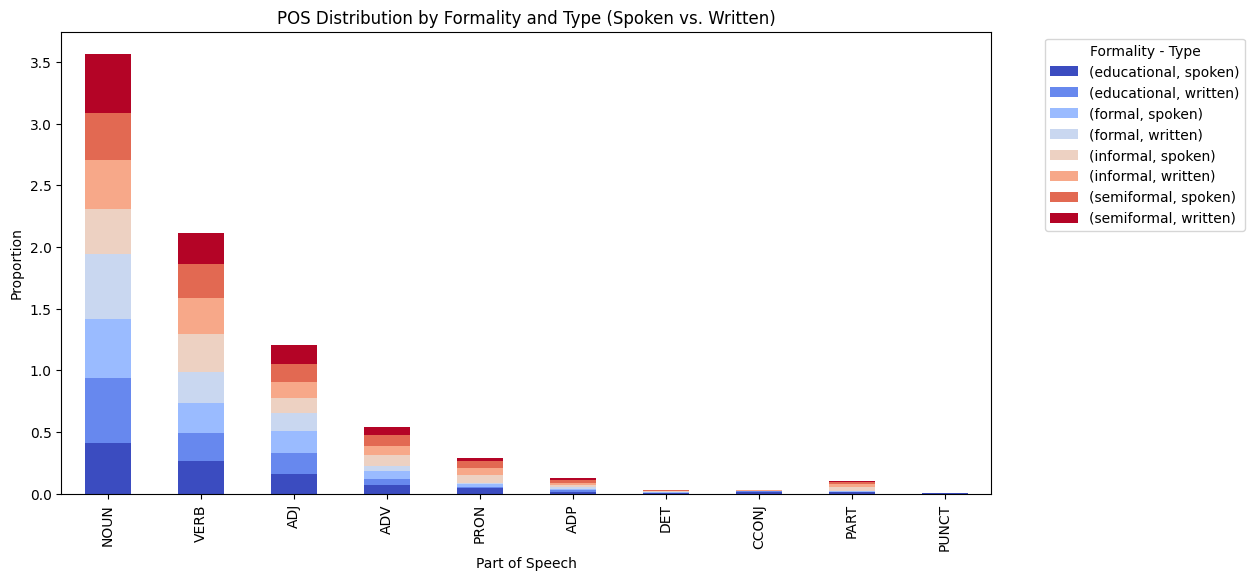

In [83]:
import matplotlib.pyplot as plt

# Aggregate POS counts by formality and type (spoken vs. written)
pos_summary = df.groupby(["formality", "type"])[pos_tags].sum()

# Normalize counts for better comparison
pos_summary = pos_summary.div(pos_summary.sum(axis=1), axis=0)

# Plot stacked bar chart for POS distribution
plt.figure(figsize=(12, 6))
pos_summary.T.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(12, 6))

plt.xlabel("Part of Speech")
plt.ylabel("Proportion")
plt.title("POS Distribution by Formality and Type (Spoken vs. Written)")
plt.legend(title="Formality - Type", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()


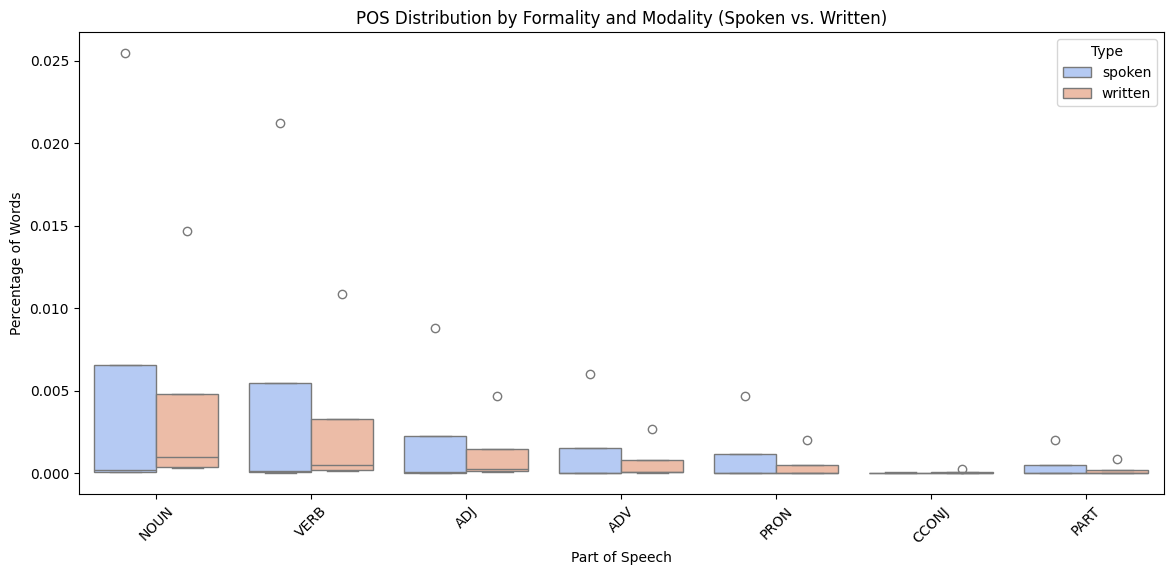

In [90]:
import seaborn as sns

# Convert POS summary to long format for seaborn
pos_summary_long = pos_summary_percentage.reset_index().melt(id_vars=["formality", "type"],
                                                             var_name="POS", value_name="Percentage")

# Plot boxplot for POS distribution
plt.figure(figsize=(14, 6))
sns.boxplot(x="POS", y="Percentage", hue="type", data=pos_summary_long, palette="coolwarm")

plt.xlabel("Part of Speech")
plt.ylabel("Percentage of Words")
plt.title("POS Distribution by Formality and Modality (Spoken vs. Written)")
plt.xticks(rotation=45)
plt.legend(title="Type")
plt.show()


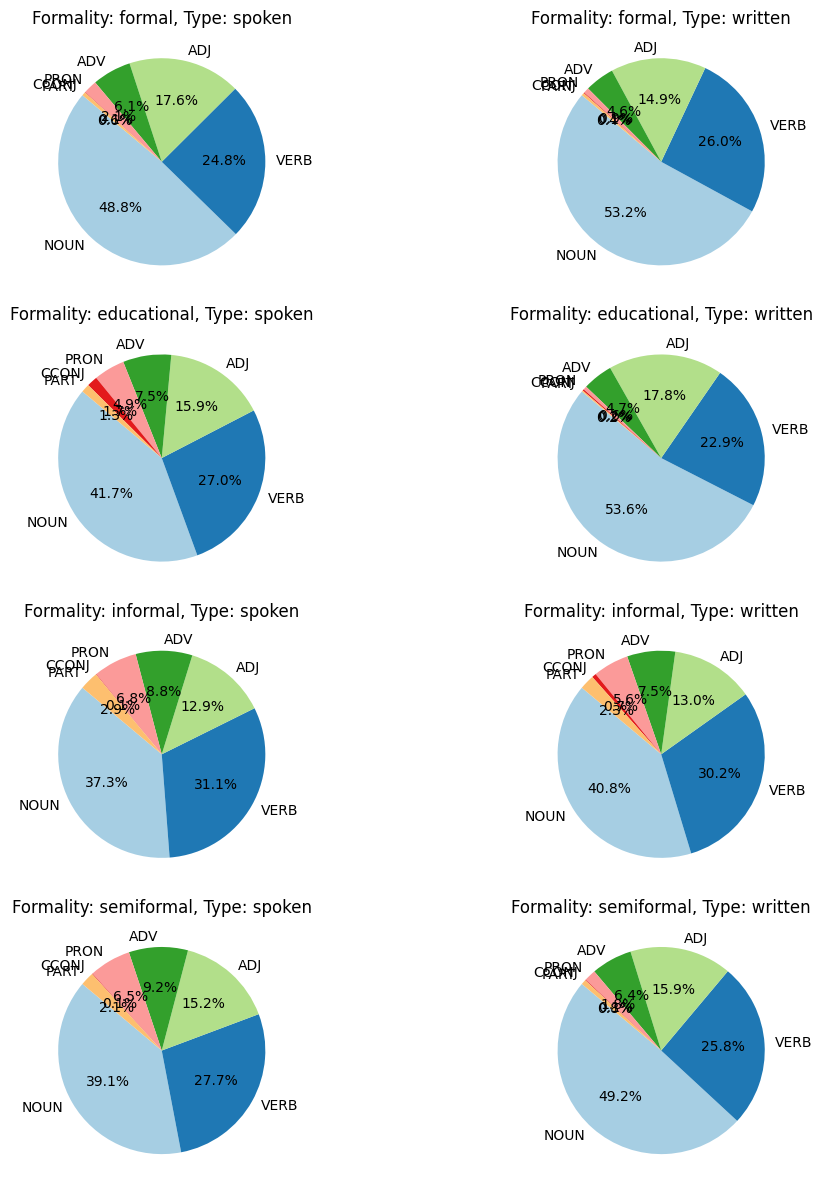

In [92]:
import matplotlib.pyplot as plt

# Get unique formality levels and types
formality_levels = df["formality"].unique()
types = df["type"].unique()

# Set up figure with subplots (assuming 4x2 layout)
fig, axes = plt.subplots(len(formality_levels), len(types), figsize=(12, 12))

# Flatten axes for easy iteration if using multiple subplots
axes = axes.flatten()

# Counter for subplot index
i = 0

# Generate pie chart for each (formality, type) combination
for formality in formality_levels:
    for type_ in types:
        # Extract the POS proportions for the current formality & type
        pos_data = pos_summary_percentage.loc[(formality, type_)]

        # Plot pie chart
        axes[i].pie(pos_data, labels=pos_data.index, autopct="%1.1f%%", startangle=140, colors=plt.cm.Paired.colors)
        axes[i].set_title(f"Formality: {formality}, Type: {type_}")

        i += 1  # Move to next subplot

# Adjust layout
plt.tight_layout()
plt.show()


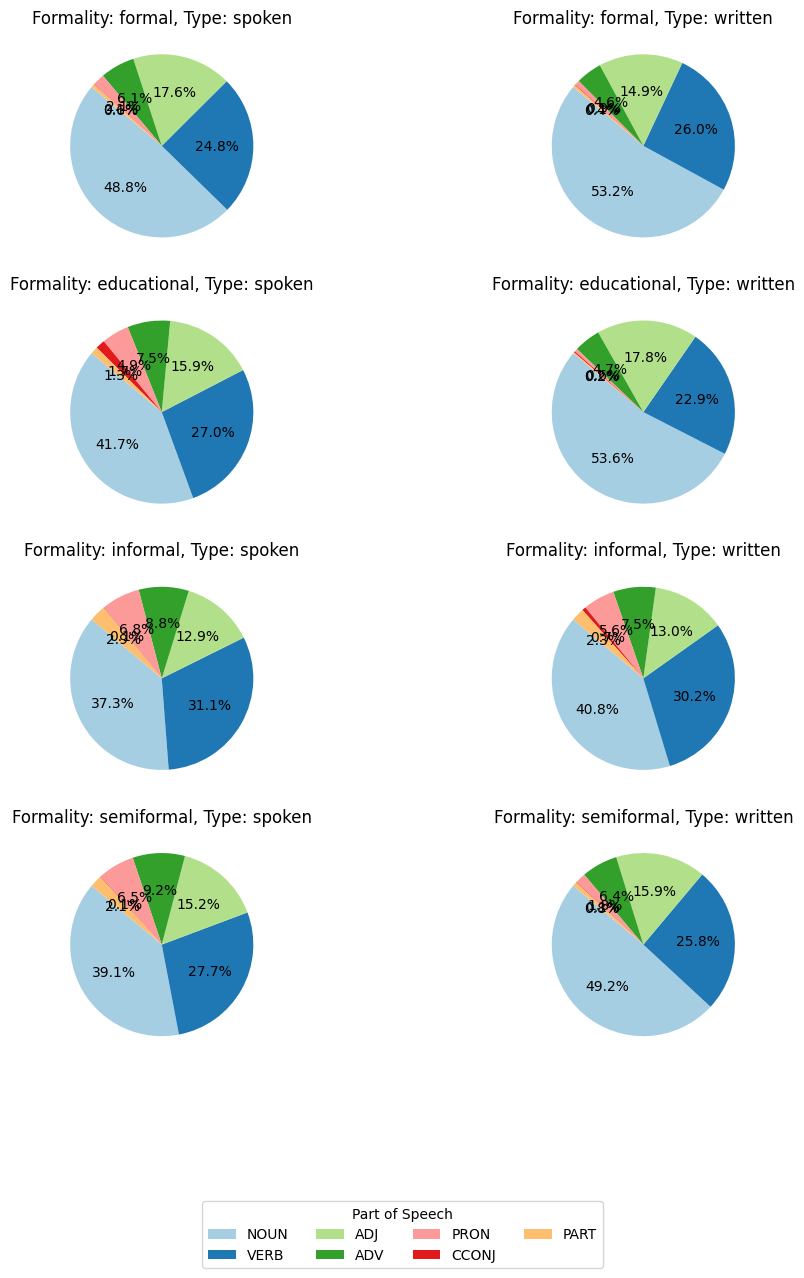

In [93]:
import matplotlib.pyplot as plt

# Get unique formality levels and types
formality_levels = df["formality"].unique()
types = df["type"].unique()

# Set up figure with subplots (4x2 grid)
fig, axes = plt.subplots(len(formality_levels), len(types), figsize=(12, 12))

# Flatten axes for easy iteration
axes = axes.flatten()

# Define a color palette for consistency
colors = plt.cm.Paired.colors

# Store labels for the legend (only once)
legend_labels = None

# Counter for subplot index
i = 0

# Generate pie chart for each (formality, type) combination
for formality in formality_levels:
    for type_ in types:
        # Extract the POS proportions for the current formality & type
        pos_data = pos_summary_percentage.loc[(formality, type_)]

        # Plot pie chart
        wedges, texts, autotexts = axes[i].pie(
            pos_data, autopct="%1.1f%%", startangle=140, colors=colors
        )

        # Store labels for legend once
        if legend_labels is None:
            legend_labels = [label for label in pos_data.index]

        # Remove text labels on pie chart
        for text in texts:
            text.set_text("")

        # Set subplot title
        axes[i].set_title(f"Formality: {formality}, Type: {type_}")

        i += 1  # Move to next subplot

# Create a single legend outside the plot
fig.legend(
    legend_labels, loc="upper center", bbox_to_anchor=(0.5, 0), ncol=4, title="Part of Speech"
)

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0.1, 1, 1])  # Leave space at bottom for the legend

# Show the plot
plt.show()


<Figure size 1200x600 with 0 Axes>

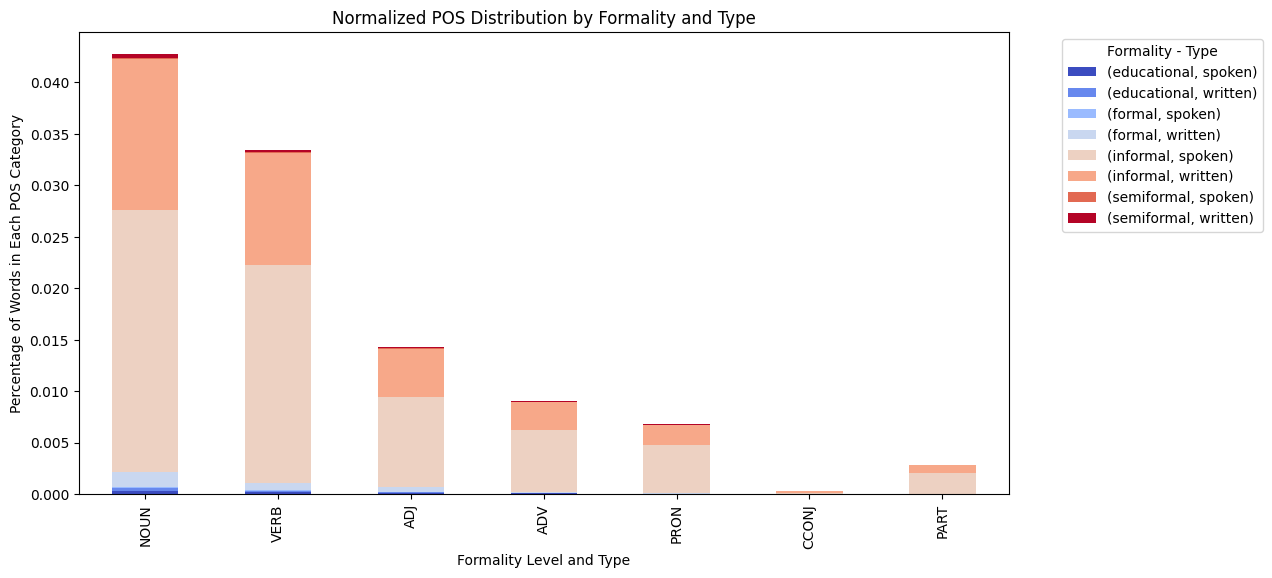

In [89]:
exclude_tags = {"PUNCT", "DET", "ADP"}

# Calculate total word count per group (sum of all POS tags per group)
total_word_counts = df.groupby(["formality", "type"])[pos_tags].sum().sum(axis=1)  # Sum of all POS tags in each group

# Correctly normalize by dividing each POS count by total words in that group
pos_summary_percentage = pos_summary.div(total_word_counts, axis=0) * 100  # Convert to percentage

# Drop PUNCT, DET, and ADP from visualization
exclude_tags = {"PUNCT", "DET", "ADP"}
pos_summary_percentage = pos_summary_percentage.drop(columns=exclude_tags, errors="ignore")

# Plot stacked bar chart for POS proportions
plt.figure(figsize=(12, 6))
pos_summary_percentage.T.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(12, 6))

plt.xlabel("Formality Level and Type")
plt.ylabel("Percentage of Words in Each POS Category")
plt.title("Normalized POS Distribution by Formality and Type")
plt.legend(title="Formality - Type", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()



SUPER INTERESTING

<Figure size 1200x600 with 0 Axes>

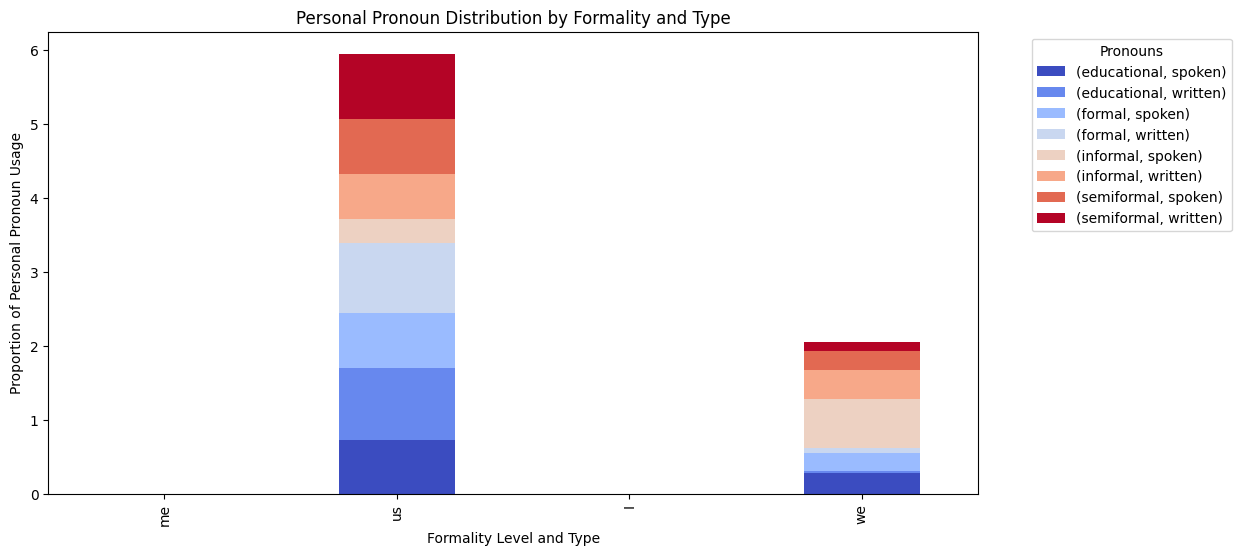

In [85]:
""" might just remove: not as relevant """
# Ensure all pronoun columns exist in the DataFrame
for pronoun in personal_pronouns:
    if pronoun not in df.columns:
        df[pronoun] = 0  # Add missing pronoun columns with zeros

# Aggregate pronoun counts by formality and type
pronoun_summary = df.groupby(["formality", "type"])[list(personal_pronouns)].sum()

# Normalize counts by row
pronoun_summary = pronoun_summary.div(pronoun_summary.sum(axis=1), axis=0)

# Plot stacked bar chart for Pronoun Distribution
plt.figure(figsize=(12, 6))
pronoun_summary.T.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(12, 6))

plt.xlabel("Formality Level and Type")
plt.ylabel("Proportion of Personal Pronoun Usage")
plt.title("Personal Pronoun Distribution by Formality and Type")
plt.legend(title="Pronouns", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()
